# Disease Prediction Model

Ángel Fabián Nodarse Díaz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Exploración Inicial 

In [2]:
df = pd.read_csv('Training.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


Esta predicción sera una tarea de clasificación basandose en 132 síntomas 

In [3]:
df.shape

(4920, 134)

El dataframe cuenta con 4920 observaciones para 134 características contando la que se va a predecir

In [4]:
df.prognosis.nunique()

41

Las enfermedades a predecir pueden ser 41 que son las siguientes...

In [5]:
df.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

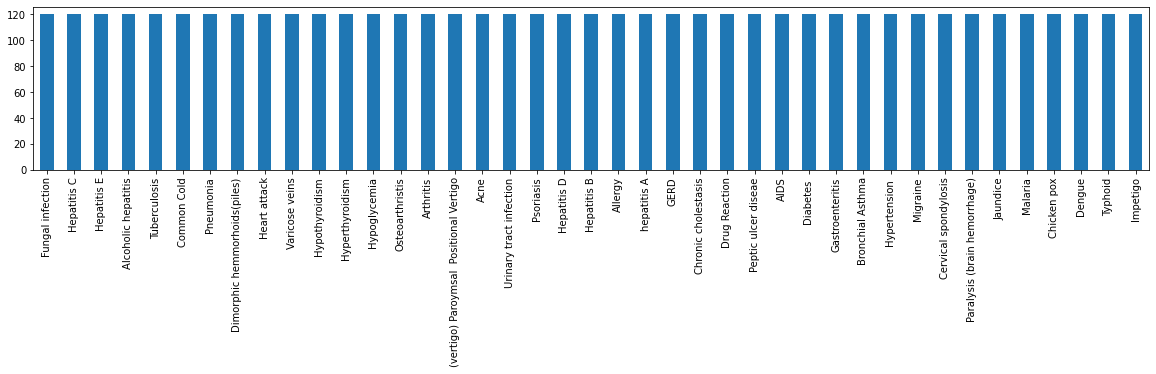

In [6]:
plt.figure(figsize=(20,3))
df['prognosis'].value_counts().plot(kind='bar')
plt.show()

Se puede observar que existe un igual número de oservaciones para cada una de las enefrmedades que se van a predecir, así entonces se puede decir que es un dataset muy estable y proporcionado para hacer una predicción consistente y concluyente

In [7]:
df.groupby('prognosis').mean()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
AIDS,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Acne,0.00,0.95,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.9,0.9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Alcoholic hepatitis,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Allergy,0.00,0.00,0.0,0.90,0.9,0.90,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Arthritis,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Bronchial Asthma,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Cervical spondylosis,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Chicken pox,0.95,0.95,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


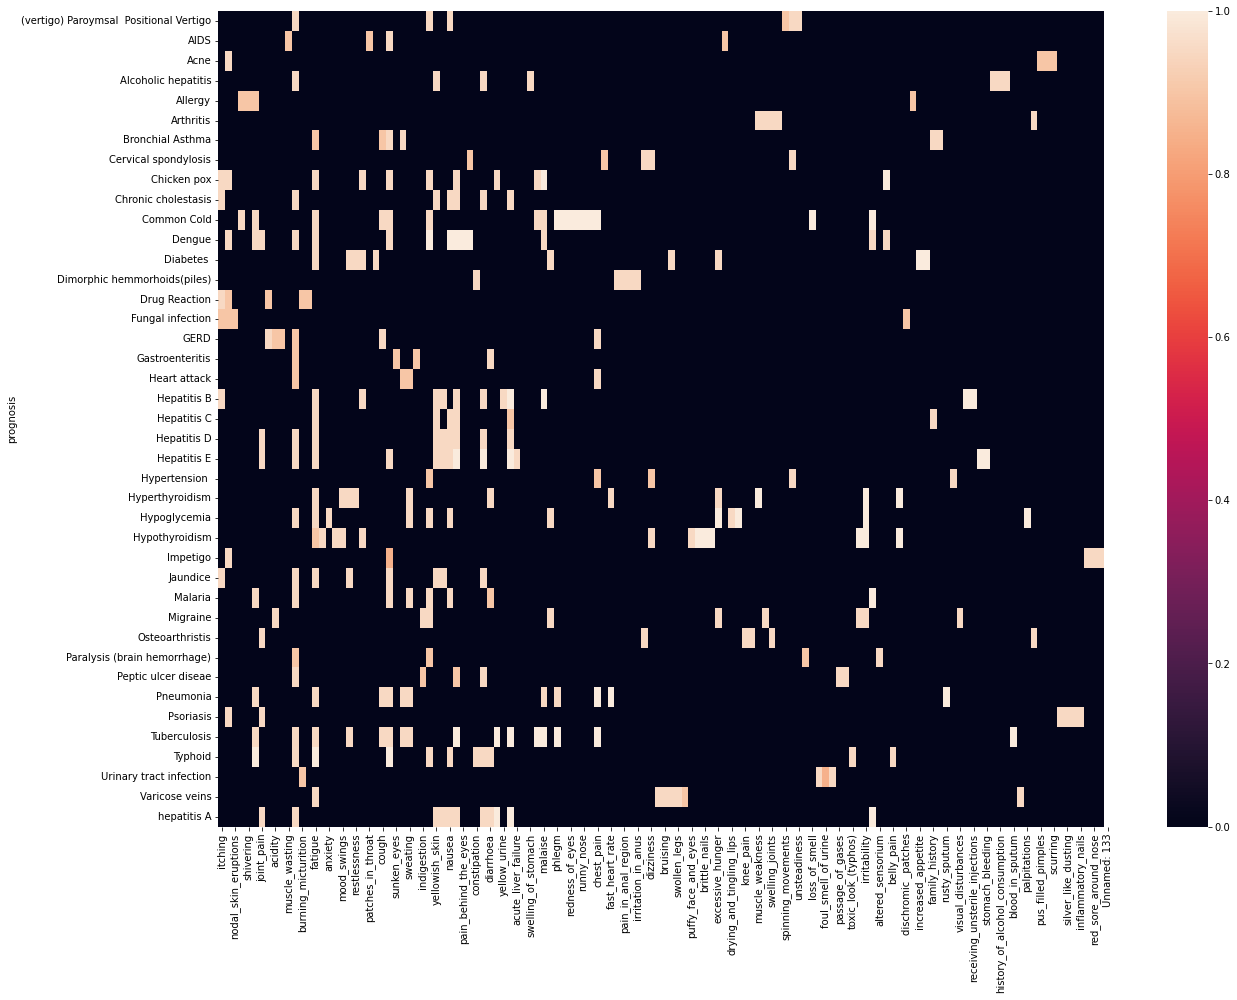

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(df.groupby('prognosis').mean())
plt.show()

## 2. Preprocesamiento, selección y extracción de características

In [11]:
df.drop('Unnamed: 133',axis=1, inplace=True)

In [12]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
encoder = OrdinalEncoder()

In [30]:
transform = encoder.fit_transform(df.prognosis.to_numpy().reshape(-1,1))
transform

array([[15.],
       [15.],
       [15.],
       ...,
       [38.],
       [35.],
       [27.]])

In [31]:
df.prognosis = transform
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2.0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38.0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35.0


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

In [37]:
train, test = train_test_split(df, test_size=0.3)

In [88]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1:]

## 3. Evaluación y selección de modelos

### KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
clf = KNeighborsClassifier()

In [50]:
cvs = cross_val_score(clf, X, y)

/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y wa

In [51]:
cvs.mean()

1.0

In [53]:
cvs.std()

0.0

### Desicion tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
clf = DecisionTreeClassifier()

In [56]:
cvs = cross_val_score(clf, X, y)

In [57]:
cvs.mean()

0.9970972423802612

In [58]:
cvs.std()

0.002753797672135035

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
clf = LogisticRegression()

In [61]:
cvs = cross_val_score(clf, X, y)

/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arr

In [62]:
cvs.mean()

1.0

In [64]:
cvs.std()

0.0

### SVC

In [65]:
from sklearn.svm import SVC

In [66]:
clf = SVC()

In [67]:
cvs = cross_val_score(clf, X, y)

/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arr

In [68]:
cvs.mean()

1.0

In [69]:
cvs.std()

0.0

Se decide escoger el clasificador de KNN 

## 4. Ajuste de Hiperparámetros

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid = {"n_neighbors":[3,5,7,9,11,13,15,20]}

In [72]:
clf = KNeighborsClassifier()

In [73]:
gs = GridSearchCV(clf, param_grid)

In [75]:
gs.fit(X, y)

/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y wa

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 20]})

In [76]:
gs.best_params_

{'n_neighbors': 3}

In [77]:
gs.cv_results_

{'mean_fit_time': array([0.01634479, 0.01494908, 0.01381521, 0.01499748, 0.01814728,
        0.01555252, 0.01167259, 0.00998678]),
 'std_fit_time': array([0.0044359 , 0.00256864, 0.00151156, 0.00336837, 0.00375766,
        0.00337023, 0.00165615, 0.00037883]),
 'mean_score_time': array([0.21037264, 0.2033494 , 0.20955448, 0.2304019 , 0.2238555 ,
        0.22881327, 0.19292474, 0.18452635]),
 'std_score_time': array([0.03062257, 0.01629523, 0.01705781, 0.01389104, 0.01646654,
        0.02525274, 0.00763242, 0.01009941]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13, 15, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13},
  {'n_neighbors': 15},
  {'n_neighbors': 20}],
 'split0_test_score': array([1., 1., 1., 1., 1., 1., 1., 1.]),
 'split1_test_score':

## 5. Evaluación final

In [93]:
from sklearn.metrics import accuracy_score

In [83]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1:]

In [80]:
clf = KNeighborsClassifier(gs.best_params_['n_neighbors'])

In [85]:
clf.fit(X, y)

/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [90]:
y_pred = clf.predict(X_test)

In [91]:
accuracy_score(y_test, y_pred)

1.0

## 6. Análisis final

accuracy 100% :)

In [98]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/angel/Documents/Universidad/Semillero Ciencia de Datos/Inteligencia Articicial para Ingenierías/Disease_Prediction/entorno/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y wa

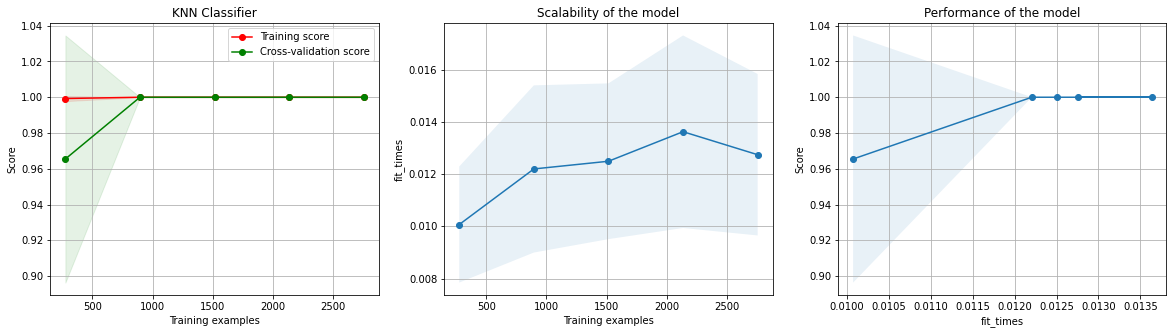

In [104]:
plot_learning_curve(clf, 'KNN Classifier', X, y)
plt.show()